In [ ]:
# crie um perceptron de camada única para classificar o conjunto de dados de flores de íris
# o conjunto de dados de flores de íris é um conjunto de dados clássico em aprendizado de máquina
# é um conjunto de dados fácil de usar para explorar diferentes algoritmos de classificação
# o conjunto de dados contém 150 amostras de flores de íris de três espécies diferentes
# cada amostra contém quatro características: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala
# o conjunto de dados é dividido em dois conjuntos: um conjunto de treinamento com 120 amostras e um conjunto de teste com 30 amostras
# o objetivo é treinar um perceptron de camada única para classificar as amostras de flores de íris em três classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
# carregar o conjunto de dados de flores de íris
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# padronizar o conjunto de dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# inicializar os pesos e o viés
np.random.seed(0)
weights = np.random.rand(X_train.shape[1], len(np.unique(y_train)))
bias = np.random.rand(len(np.unique(y_train)))

In [8]:
# função de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
# função de treinamento
def train(X, y, weights, bias, epochs, learning_rate):
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # feedforward
            z = np.dot(X[i], weights) + bias
            a = sigmoid(z)
            # backpropagation
            error = y[i] - a
            weights += learning_rate * np.outer(X[i], error)
            bias += learning_rate * error
    return weights, bias

In [10]:
# função de previsão
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    a = sigmoid(z)
    return np.argmax(a, axis=1)

In [11]:
# treinar o perceptron
weights, bias = train(X_train, pd.get_dummies(y_train).values, weights, bias, epochs=100, learning_rate=0.01)

In [12]:
# fazer previsões
y_pred = predict(X_test, weights, bias)

In [16]:
# calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9


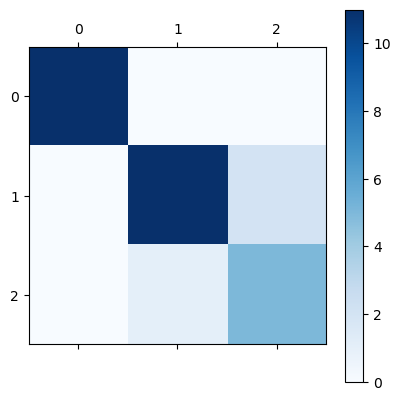

In [14]:
# plotar a matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.matshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.show()

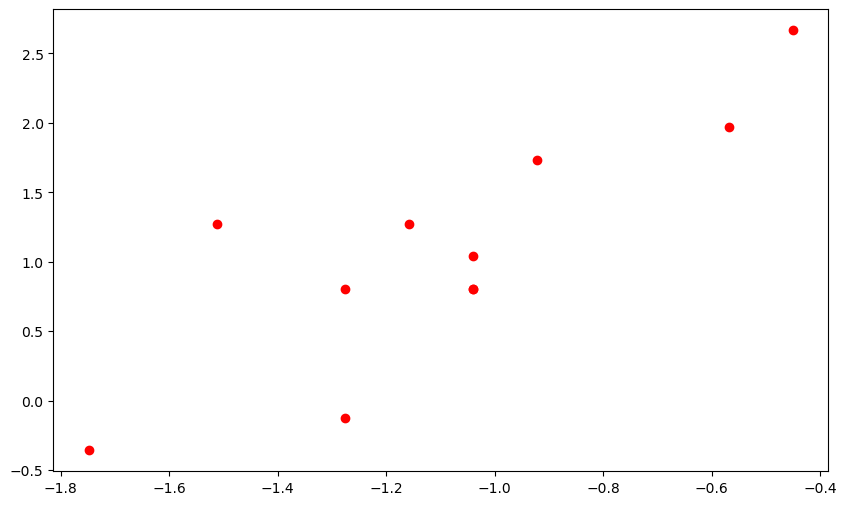

In [15]:
# plotar a fronteira de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='setosa')